This tutorial is based on the the medium article [Simple Linear Regression Tutorial for Machine Learning (ML)](https://medium.com/towards-artificial-intelligence/calculating-simple-linear-regression-and-linear-best-fit-an-in-depth-tutorial-with-math-and-python-804a0cb23660)<br><br>

We'll build the model from scratch using known formulas to define the regression straight line. The objective of this tutorial is build  a model to predict the house price based on its surface.<br>

The objective here is to build a model to predict cars CO2 emissions from different cars features.



In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [86]:
# Read datasetb
data = pd.read_csv('Fuel_Consumption.csv', sep = ',')
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2,4,AS5,Z,9,6,8,33,196
1,2014,ACURA,ILX,COMPACT,2,4,M6,Z,11,7,9,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1,4,AV7,Z,6,5,5,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3,6,AS6,Z,12,9,11,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3,6,AS6,Z,12,8,10,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3,6,AS6,X,13,9,11,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3,6,AS6,X,13,9,11,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3,6,AS6,X,13,9,11,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3,6,AS6,X,12,9,11,25,260


In [3]:
data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [4]:
# find datatype of each column and check if records have null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
# Selects the columns to build the model
data = data[['ENGINESIZE', 'CO2EMISSIONS']]
print(data.head())

   ENGINESIZE  CO2EMISSIONS
0         2.0           196
1         2.4           221
2         1.5           136
3         3.5           255
4         3.5           244


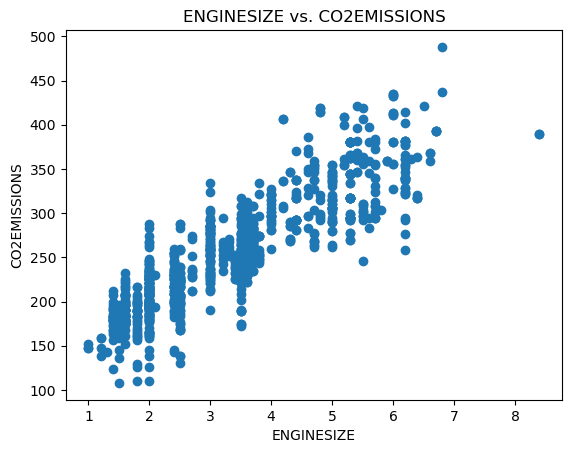

In [6]:
# Scatter plot ENGINESIZE vs. CO2EMISSIONS
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'])
plt.title('ENGINESIZE vs. CO2EMISSIONS')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()


In [7]:
# Divide data between training (80%) and testing(20%) datasets
num = int(len(data) * 0.8)

train = data[:num]
test = data[num:]

print(f"Data: {len(data)}")
print(f"Train: {len(train)}")
print(f"Test: {len(test)}")


Data: 1067
Train: 853
Test: 214


# Making predictions by building a linear regression model from scratch

In [43]:
# Main function to calculate the line coefficients

def simple_linear_regression(input_feature, output):
    xi = input_feature
    yi = output

    # Total number of data points in teh training dataset
    n = len(xi)

    #X bar
    x_mean = xi.mean()

    #Y bar
    y_mean = yi.mean()

    # Slope calculation
    s_xiyi = (xi * yi).sum()
    s_ybar_xi = (xi * y_mean).sum()
    s_xi_sqrt = (xi ** 2).sum()
    s_xbar_xi = (xi * x_mean).sum()
    slope = (s_xiyi - s_ybar_xi) / (s_xi_sqrt - s_xbar_xi)

    # Intercept calculation
    b = y_mean - slope * x_mean

    return slope, b

In [44]:
# Checking the calculations of slope and intercept are right
x_test = np.array((1, 2, 3, 4, 5))
y_test = np.array((1, 2, 3, 4, 5))
slope, intercept = simple_linear_regression(x_test, y_test)

print(f"slope: {slope}")
print(f"intercept: {intercept}")


slope: 1.0
intercept: 0.0


In [47]:
# Calculates the slope and intercept for the training data
slope, intercept = simple_linear_regression(train["ENGINESIZE"], train['CO2EMISSIONS'])
print(f"slope: {slope}")
print(f"intercept: {intercept}")

slope: 38.79512383605654
intercept: 127.16989950881938


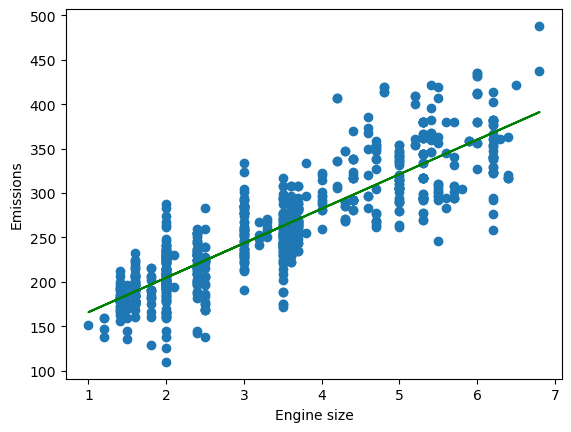

In [48]:
# Displaying the regression function with the training data

plt.scatter(train["ENGINESIZE"], train['CO2EMISSIONS'])
plt.plot(train["ENGINESIZE"], slope * train['ENGINESIZE'] + intercept, color='green')
plt.xlabel("Engine size")
plt.ylabel("Emissions")
plt.show()

In [51]:
# Defines the prediction function
def get_regression_prediction(input_features, slope, intercept):
    return slope * input_features + intercept

In [58]:
# Predicting values on the test dataset

test.loc[:, 'CO2EMISSIONS_prediction'] = get_regression_prediction(test["ENGINESIZE"], slope, intercept)
test

,ENGINESIZE,CO2EMISSIONS,CO2EMISSIONS_prediction
853,2,202,224
854,3,255,262
855,2,191,224
856,2,198,224
857,1,161,197
...,...,...,...
1062,3,271,243
1063,3,264,251
1064,3,271,243
1065,3,260,251


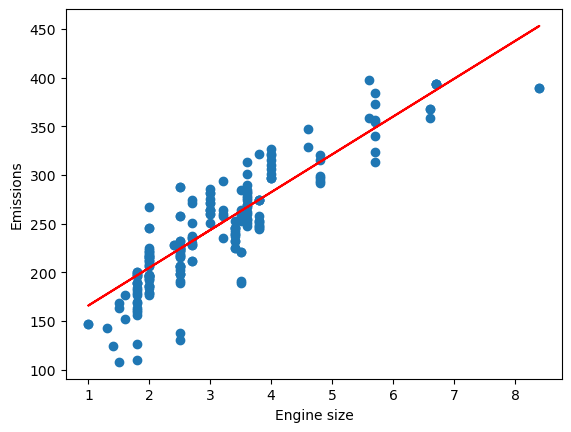

In [60]:
# Displaying the regression function with the test data

plt.scatter(test['ENGINESIZE'], test['CO2EMISSIONS'])
plt.plot(test['ENGINESIZE'],test['CO2EMISSIONS_prediction'], color='red')
plt.xlabel("Engine size")
plt.ylabel("Emissions")
plt.show()

<Axes: >

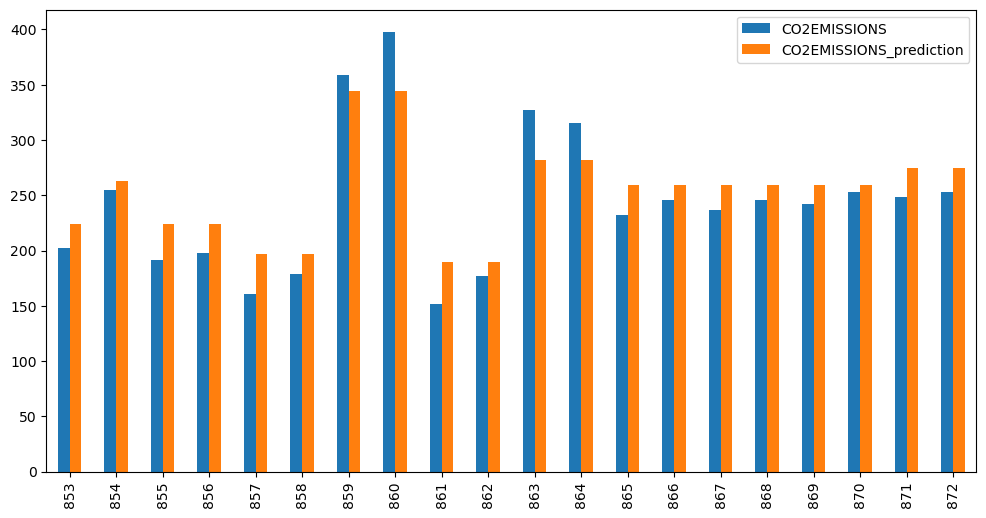

In [66]:
# Plot the difference between actual and predicted values
test[['CO2EMISSIONS', 'CO2EMISSIONS_prediction']].head(20).plot(kind='bar', figsize=(12, 6))


In [68]:
# Calculating the residual sum of squares

def residual_sum_sqr(input_feature, actual_values, slope, intercept):
    prediction = slope * input_feature + intercept

    residual = (actual_values - prediction)
    RSS = (residual ** 2).sum()

    return RSS

In [70]:
# Calculating error

print(f"RSS: {residual_sum_sqr(test['ENGINESIZE'], test['CO2EMISSIONS'], slope, intercept)}")

RSS: 159741.10295932175


# Making predictions by building a regression model with skitlearn

In [80]:
# Training the model

regresssion_model = linear_model.LinearRegression()

regresssion_model.fit(train[['ENGINESIZE']], train[['CO2EMISSIONS']])

model_coefficients = regresssion_model.coef_
intercept = regresssion_model.intercept_

print(f"slope = {model_coefficients[0]}")
print(f"Intercept = {intercept}")

slope = [38.79512384]
Intercept = [127.16989951]


In [82]:
# Predicting values for the test dataset
test.loc[:, 'CO2EMISSIONS_pred_model'] = regresssion_model.predict(test[['ENGINESIZE']])
test


,ENGINESIZE,CO2EMISSIONS,CO2EMISSIONS_prediction,CO2EMISSIONS_pred_model
853,2,202,224,224
854,3,255,262,262
855,2,191,224,224
856,2,198,224,224
857,1,161,197,197
...,...,...,...,...
1062,3,271,243,243
1063,3,264,251,251
1064,3,271,243,243
1065,3,260,251,251


<Axes: >

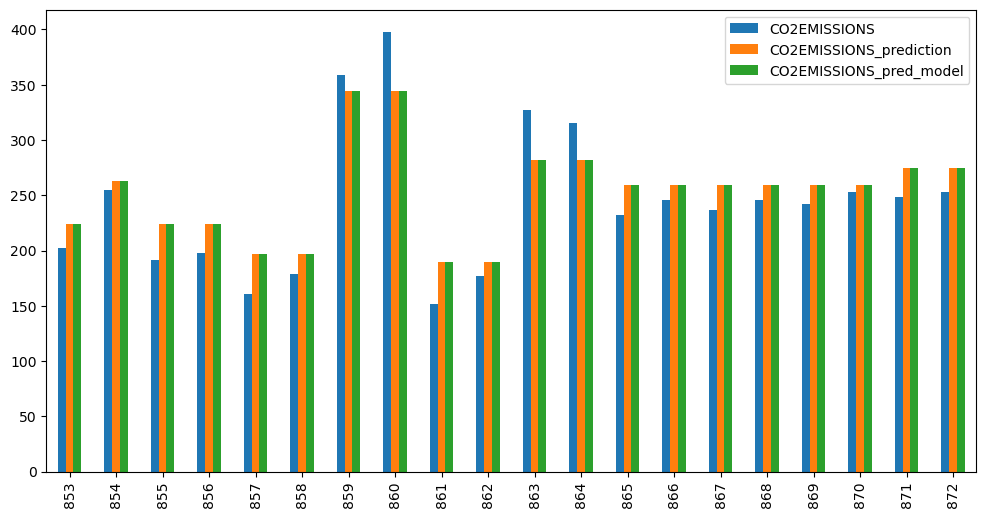

In [83]:
# Plot the difference between actual and predicted values
test[['CO2EMISSIONS', 'CO2EMISSIONS_prediction', 'CO2EMISSIONS_pred_model']].head(20).plot(kind='bar', figsize=(12, 6))

# Making predictions by building a regression model with skitlearn and using all numerical features

In [95]:
# Data split
num = int(len(data) * 0.8)

train = data.loc[:num, ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]
test = data.loc[num:, ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]


In [96]:
# Training the model

regresssion_model = linear_model.LinearRegression()

regresssion_model.fit(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']], train[['CO2EMISSIONS']])

model_coefficients = regresssion_model.coef_
intercept = regresssion_model.intercept_

print(f"slope = {model_coefficients[0]}")
print(f"Intercept = {intercept}")

slope = [ 7.8494973   8.42021999 -3.60209627  2.47635951  4.34849132 -4.07949843]
Intercept = [262.4985275]


In [97]:
# Predicting values for the test dataset
test.loc[:, 'CO2EMISSIONS_pred_model'] = regresssion_model.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']])
test


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,CO2EMISSIONS_pred_model
853,2,4,9,8,8,32,202,211
854,3,6,12,9,11,25,255,265
855,2,4,9,7,8,34,191,197
856,2,4,9,7,8,33,198,202
857,1,4,7,6,7,40,161,164
...,...,...,...,...,...,...,...,...
1062,3,6,13,9,11,24,271,265
1063,3,6,13,9,11,25,264,262
1064,3,6,13,9,11,24,271,265
1065,3,6,12,9,11,25,260,261


<Axes: >

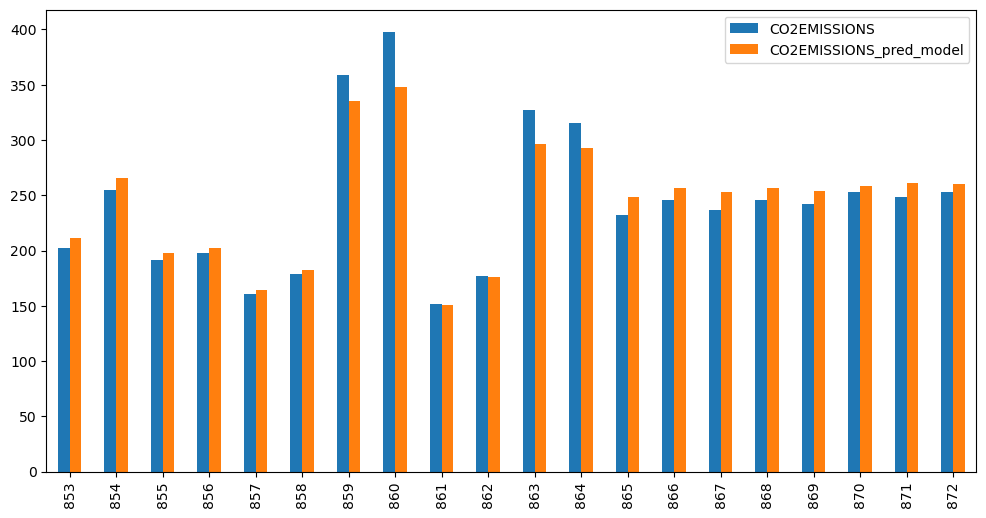

In [98]:

# Plot the difference between actual and predicted values
test[['CO2EMISSIONS', 'CO2EMISSIONS_pred_model']].head(20).plot(kind='bar', figsize=(12, 6))

In [99]:
# RSS calculation

residual = (test['CO2EMISSIONS'] - test['CO2EMISSIONS_pred_model'])
RSS = (residual ** 2).sum()

print(f"RSS = {RSS}")


RSS = 47596.17181092819


By including all the numerical features in the dataset I could reduce the RSS of the model by 70% (15 941 with only 1 feature and 47 596 with all numerical features)